# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.config.list_physical_devices("GPU")

[]

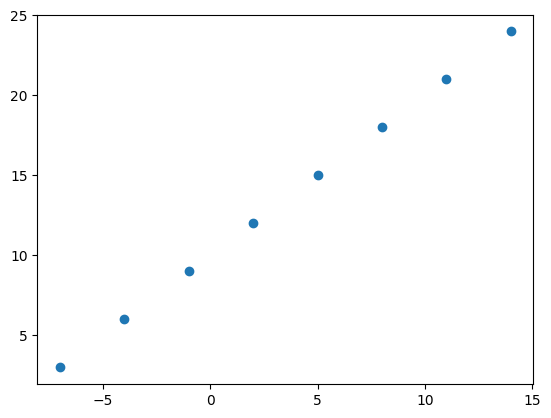

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [5]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [6]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [7]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

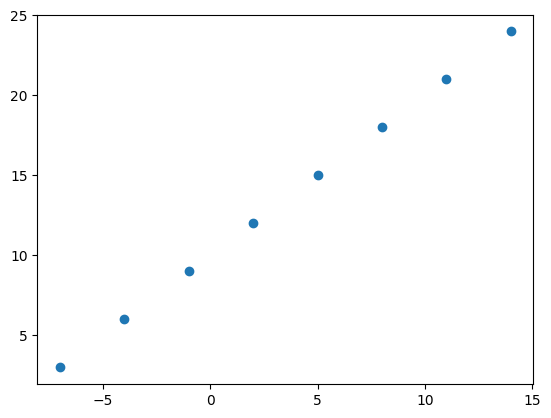

In [11]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

In [12]:
tf.random.set_seed(42)

# Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 518ms/step - loss: 16.7650 - mae: 16.7650
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 16.4838 - mae: 16.4838
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 16.2025 - mae: 16.2025
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 15.9213 - mae: 15.9213
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 15.6400 - mae: 15.6400


In [13]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 94ms/step


array([[-8.50107]], dtype=float32)

In [14]:
y_pred + 11

array([[2.49893]], dtype=float32)

## Improving our model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 339ms/step - loss: 12.8068 - mae: 12.8068
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6743 - mae: 12.6743
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.5418 - mae: 12.5418
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.4093 - mae: 12.4093
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2768 - mae: 12.2768
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 12.1443 - mae: 12.1443
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 12.0118 - mae: 12.0118
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 11.8793 - mae: 11.8793
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 11.7468 - mae: 11.7468
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 11.6143 - mae: 11.6143
Epoch 11/100
1/1 [==============================] - 0s

In [16]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 60ms/step


array([[29.809362]], dtype=float32)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model.compile(loss=tf.keras.metrics.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.mae)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 409ms/step - loss: 14.6054 - mean_absolute_error: 14.6054
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 14.0669 - mean_absolute_error: 14.0669
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 13.5328 - mean_absolute_error: 13.5328
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 13.0004 - mean_absolute_error: 13.0004
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 12.4669 - mean_absolute_error: 12.4669
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 11.9295 - mean_absolute_error: 11.9295
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 11.3855 - mean_absolute_error: 11.3855
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8320 - mean_absolute_error: 10.8320
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2662 - mean_absolute_error: 10.2662
Epoch 10

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.metrics.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.05),
              metrics=(["mae"]))

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 542ms/step - loss: 11.8565 - mae: 11.8565
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8520 - mae: 11.8520
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8475 - mae: 11.8475
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.8430 - mae: 11.8430
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 11.8385 - mae: 11.8385
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 11.8340 - mae: 11.8340
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 11.8295 - mae: 11.8295
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 11.8250 - mae: 11.8250
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 11.8205 - mae: 11.8205
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 11.8160 - mae: 11.8160
Epoch 11/100
1/1 [==============================] - 0s 8m

In [20]:
model.predict([17])

1/1 [==============================] - 0s 61ms/step


array([[9.782721]], dtype=float32)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 942ms/step - loss: 13.9376 - mae: 13.9376
Epoch 2/100
1/1 [==============================] - 0s 50ms/step - loss: 13.8719 - mae: 13.8719
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 13.8062 - mae: 13.8062
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 13.7407 - mae: 13.7407
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 13.6752 - mae: 13.6752
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 13.6097 - mae: 13.6097
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 13.5444 - mae: 13.5444
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.4791 - mae: 13.4791
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 13.4139 - mae: 13.4139
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 13.3487 - mae: 13.3487
Epoch 11/100
1/1 [==============================

In [22]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [23]:
model.predict([17])

1/1 [==============================] - 0s 105ms/step


array([[29.076273]], dtype=float32)

Maybe the model above is overfitting.

## Evaluating a model

In [24]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

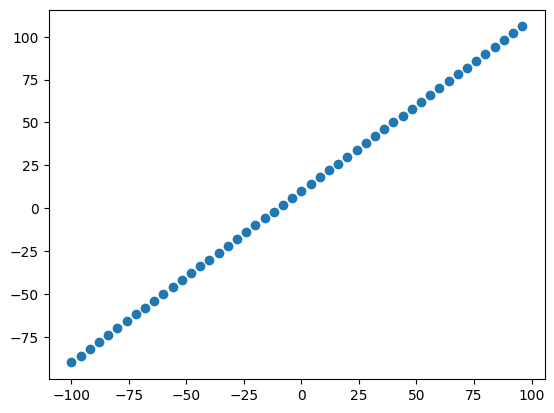

In [26]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40,), (10,), (40,), (10,))

In [28]:
len(X)

50

In [29]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

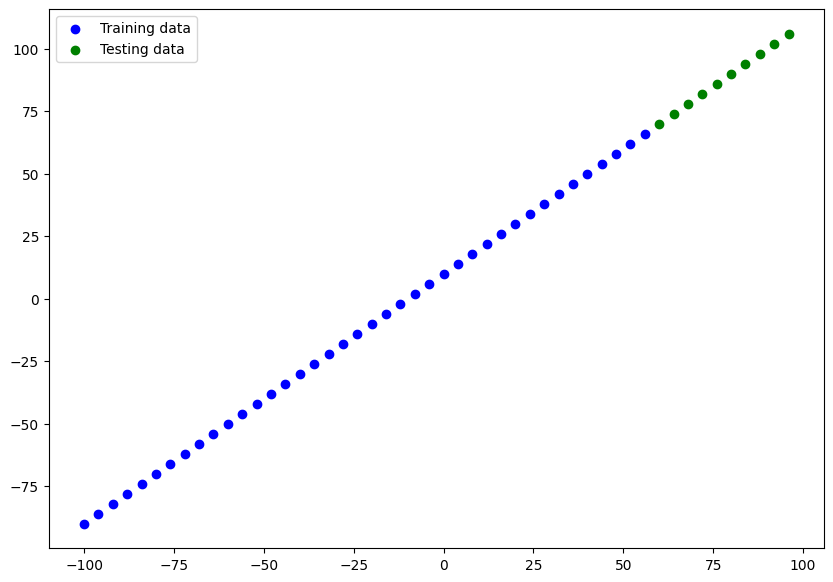

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [32]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Let's fit our model.
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 20ms/step - loss: 109.4887 - mae: 109.4887
Epoch 2/100
2/2 [==============================] - 0s 21ms/step - loss: 74.0332 - mae: 74.0332
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 36.4772 - mae: 36.4772
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 7.6886 - mae: 7.6886
Epoch 5/100
2/2 [==============================] - 0s 19ms/step - loss: 9.1894 - mae: 9.1894
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6565 - mae: 8.6565
Epoch 7/100
2/2 [==============================] - 0s 19ms/step - loss: 9.0822 - mae: 9.0822
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1193 - mae: 9.1193
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 19.9706 - mae: 19.9706
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 10.8160 - mae: 10.8160
Epoch 11/100
2/2 [==============================] - 0s 8ms/st

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.build(input_shape=[None, 2])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [46]:
type(X_train)

tensorflow.python.framework.ops.EagerTensor

In [47]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

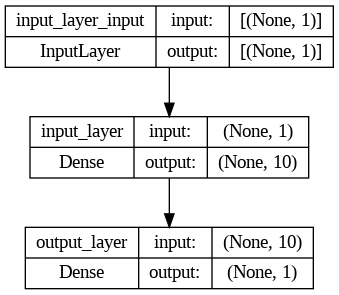

In [48]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=[1], name="hidden_layer_1"),
    tf.keras.layers.Dense(10, name="hidden_layer_2"),
    tf.keras.layers.Dense(5, name="hidden_layer_3"),
    tf.keras.layers.Dense(1, name="output_layer")
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 5)                 10        
                                                                 
 hidden_layer_2 (Dense)      (None, 10)                60        
                                                                 
 hidden_layer_3 (Dense)      (None, 5)                 55        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

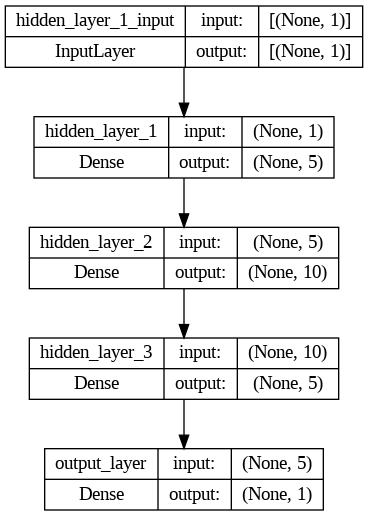

In [56]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

In [57]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 68ms/step


array([[54.092537],
       [57.644596],
       [61.19665 ],
       [64.7487  ],
       [68.30075 ],
       [71.852806],
       [75.404854],
       [78.9569  ],
       [82.508965],
       [86.06101 ]], dtype=float32)

In [58]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [136]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(5, input_shape=[1]),
  tf.keras.layers.Dense(1)
   # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [137]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 61ms/step


array([[ 76.51463 ],
       [ 81.49882 ],
       [ 86.483   ],
       [ 91.46719 ],
       [ 96.451385],
       [101.43557 ],
       [106.419754],
       [111.40394 ],
       [116.38812 ],
       [121.3723  ]], dtype=float32)

In [138]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [139]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();

In [140]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, y_pred.shape

(TensorShape([40]),
 TensorShape([40]),
 TensorShape([10]),
 TensorShape([10]),
 (10, 1))

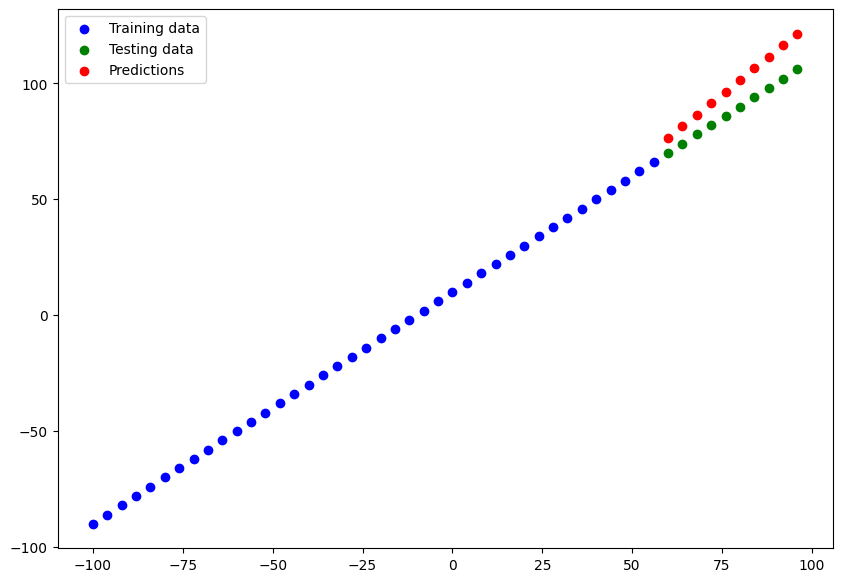

In [141]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

## Evaluating our model's predictions with regression evaluation metrics

In [142]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 194ms/step - loss: 10.9435 - mae: 10.9435


[10.943471908569336, 10.943471908569336]

In [143]:
y_pred

array([[ 76.51463 ],
       [ 81.49882 ],
       [ 86.483   ],
       [ 91.46719 ],
       [ 96.451385],
       [101.43557 ],
       [106.419754],
       [111.40394 ],
       [116.38812 ],
       [121.3723  ]], dtype=float32)

In [144]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [135]:
tf.keras.losses.MAE(y_test, y_pred)

array([13.395338 , 11.073901 , 10.       , 10.252704 , 11.6950655,
       14.327085 , 18.185944 , 23.16008  , 28.134222 , 33.108353 ],
      dtype=float32)

In [129]:
tf.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.395338 , 11.073901 , 10.       , 10.252704 , 11.6950655,
       14.327085 , 18.185944 , 23.16008  , 28.134222 , 33.108353 ],
      dtype=float32)>

In [147]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.943472>

In [149]:
mse = tf.metrics.mean_squared_error(y_test,
                                   tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=127.750694>

In [150]:
tf.keras.losses.mae(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=10.943472>